In [20]:
# Testing error bar code

# Imports
from plot_methods import plot_parity, select_valid_overpasses
from data_methods import load_clean_data, load_meter_data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

# Load data
cm_1, ghg_1, kairos_1_ls23 = load_clean_data()
cm_meter, ghg_meter, kairos_1_ls23_meter = load_meter_data()

# Info for plotting
operator = 'CarbonMapper'
stage = 1

# Merge the two data frames
cm_plot = cm_1.merge(cm_meter, on='PerformerExperimentID')

# Filter based on overpasses that meet Stanford's QC criteria
cm_plot = cm_plot[(cm_plot['QC: discard - from Stanford'] == 0)]

y_index = np.isfinite(cm_plot['FacilityEmissionRate'])

# Select x data
x_data = cm_plot['Last 60s (kg/h) - from Stanford']
y_data = cm_plot['FacilityEmissionRate']


# Fit linear regression via least squares with numpy.polyfit
# m is slope, intercept is b
m, b = np.polyfit(x_data[y_index], y_data[y_index], deg=1)

# Calculate R^2 value
# (using method described here: https://www.askpython.com/python/coefficient-of-determination)
correlation_matrix = np.corrcoef(x_data[y_index], y_data[y_index])
correlation = correlation_matrix[0,1]
r2 = correlation ** 2

# Number of valid overpasses:
sample_size = len(y_data)

# Set x and y max values
# Manually set largest x and y value by changing largest_kgh here to desired value:
# largest_kgh = 1200

# Or, determine largest_kgh by calculating largest value in x_data and y_data
largest_kgh = max(max(x_data), max(y_data))
largest_kgh = math.ceil(largest_kgh / 100) * 100

# Create sequence of numbers for plotting linear fit (x)
x_seq = np.linspace(0, largest_kgh, num=100)

# Make Figure
# Initialize layout
y_error = cm_plot['FacilityEmissionRateUpper'] - cm_plot['FacilityEmissionRate']


# Add linear regression
plt.plot(x_seq, m * x_seq + b, color='k', lw=2,
         label=f'Best Fit ($y = {m:0.2f}x+{b:0.2f}$, $R^2 =$ {r2:0.4f})')

# Add x = y line
plt.plot(x_seq, x_seq, color='k', lw=2, linestyle='--',
         label='y = x')


#Add data
# plt.plot(x_data, y_data,
#          linestyle='none',
#          marker='o',
#          markersize=5,
#          mfc='white',
#          label=f'{operator} Stage {stage} data')

fig, ax = plt.subplots(1, figsize=(6, 6))
ax.errorbar = (x_data, y_data, linestyle='none', yerr=y_error)


# Set title
plt.title(f'{operator} Stage {stage} Results ({sample_size} measurements)')

# Set axes
ax.set(xlim=(0, largest_kgh),
       ylim=(0, largest_kgh),
       alpha=0.8)

# Equalize Axes
ax.set_aspect('equal', adjustable='box')

# Set axes and background color to white
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')

# Axes labels
plt.xlabel('Methane Release Rate (kgh)', fontsize=14)
plt.ylabel('Reported Release Rate (kgh)', fontsize=14)
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in', which='minor', length=3, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in', which='major', length=6, bottom=True, top=True, left=True, right=True)
plt.grid(False)  # remove grid lines

# Legend
plt.legend(facecolor='white')

# # Save figure
# now = datetime.datetime.now()
# save_time = now.strftime("%Y%m%d")
# fig_name = f'{operator}_stage{stage}_{save_time}'
# fig_path = pathlib.PurePath('04_figures', fig_name)
# plt.savefig(fig_path)

# Show plot
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4101516974.py, line 79)

In [11]:
cm_plot['FacilityEmissionRateUpper'] - cm_plot['FacilityEmissionRate']

0       44.707304
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
115           NaN
116     89.304531
118    115.605801
119     27.194636
120    218.900050
Length: 112, dtype: float64

In [10]:
cm_plot['FacilityEmissionRate'] - cm_plot['FacilityEmissionRateLower']


0       44.707304
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
115           NaN
116     89.304531
118    115.605801
119     27.194636
120    218.900050
Length: 112, dtype: float64

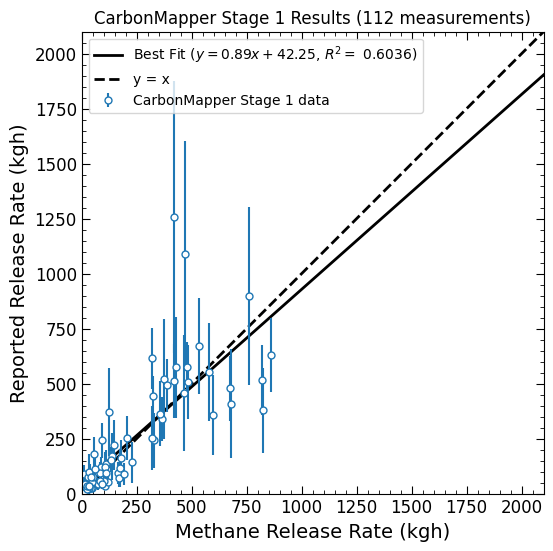

In [2]:
# Imports
from plot_methods import plot_parity, select_valid_overpasses
from data_methods import load_clean_data, load_meter_data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

# Load data
cm_1, ghg_1, kairos_1_ls23 = load_clean_data()
cm_meter, ghg_meter, kairos_1_ls23_meter = load_meter_data()

# Info for plotting
operator = 'CarbonMapper'
stage = 1

# # Merge the two data frames
# cm_plot = cm_1.merge(cm_meter, on='PerformerExperimentID')
#
# # Filter based on overpasses that meet Stanford's QC criteria
# cm_plot = cm_plot[(cm_plot['QC: discard - from Stanford'] == 0)]

# Merge the operator report df and meter df
cm_plot = select_valid_overpasses(cm_1, cm_meter)

y_index = np.isfinite(cm_plot['FacilityEmissionRate'])

# Select x data
x_data = cm_plot['Last 60s (kg/h) - from Stanford']
y_data = cm_plot['FacilityEmissionRate']
y_error = cm_plot['FacilityEmissionRateUpper'] - cm_plot['FacilityEmissionRate']


# Fit linear regression via least squares with numpy.polyfit
# m is slope, intercept is b
m, b = np.polyfit(x_data[y_index], y_data[y_index], deg=1)

# Calculate R^2 value
# (using method described here: https://www.askpython.com/python/coefficient-of-determination)
correlation_matrix = np.corrcoef(x_data[y_index], y_data[y_index])
correlation = correlation_matrix[0,1]
r2 = correlation ** 2

# Number of valid overpasses:
sample_size = len(y_data)

# Set x and y max values
# Manually set largest x and y value by changing largest_kgh here to desired value:
# largest_kgh = 1200

# Or, determine largest_kgh by calculating largest value in x_data and y_data
largest_kgh = max(max(x_data), max(y_data)) + max(y_error)
largest_kgh = math.ceil(largest_kgh / 100) * 100

# Create sequence of numbers for plotting linear fit (x)
x_seq = np.linspace(0, largest_kgh, num=100)


fig, ax = plt.subplots(1, figsize=(6, 6))
# Add linear regression
plt.plot(x_seq, m * x_seq + b, color='k', lw=2,
         label=f'Best Fit ($y = {m:0.2f}x+{b:0.2f}$, $R^2 =$ {r2:0.4f})')

# Add x = y line
plt.plot(x_seq, x_seq, color='k', lw=2, linestyle='--',
         label='y = x')

ax.errorbar(x_data, y_data,
            yerr=y_error,
            linestyle='none',
            mfc='white',
            label=f'{operator} Stage {stage} data',
            fmt='o',
            markersize=5)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Line plot with error bars')

# Set title
plt.title(f'{operator} Stage {stage} Results ({sample_size} measurements)')

# Set axes
ax.set(xlim=(0, largest_kgh),
       ylim=(0, largest_kgh),
       alpha=0.8)

# Equalize Axes
ax.set_aspect('equal', adjustable='box')

# Set axes and background color to white
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')

# Axes labels
plt.xlabel('Methane Release Rate (kgh)', fontsize=14)
plt.ylabel('Reported Release Rate (kgh)', fontsize=14)
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in', which='minor', length=3, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in', which='major', length=6, bottom=True, top=True, left=True, right=True)
plt.grid(False)  # remove grid lines

# Legend
plt.legend(facecolor='white')

plt.show()


In [29]:
print(y_error)

0       44.707304
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
115           NaN
116     89.304531
118    115.605801
119     27.194636
120    218.900050
Length: 112, dtype: float64


In [30]:
max(y_error)

617.2515971999999

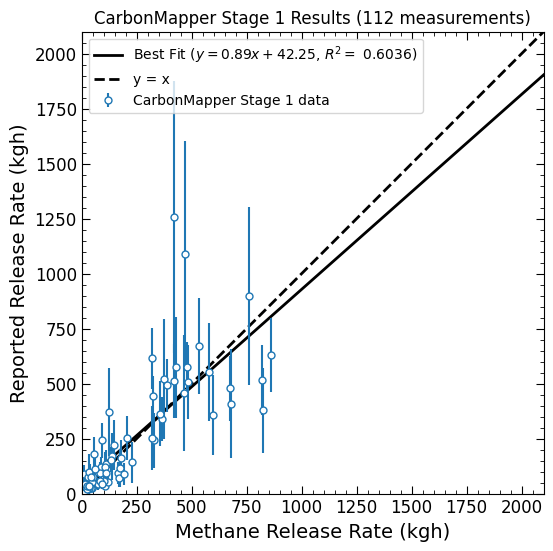

In [2]:
from plot_methods import plot_parity
from data_methods import load_clean_data
from data_methods import load_meter_data

# Load data
cm_1, ghg_1, kairos_1_ls23 = load_clean_data()
cm_meter, ghg_meter, kairos_1_ls23_meter = load_meter_data()

# Info for plotting
operator = 'CarbonMapper'
stage = 1

plot_parity(operator, stage, cm_1, cm_meter)

In [18]:
import numpy as np
test = [np.nan, np.nan, np.nan]
print(test)
mtest = max(test)
print(np.isnan(mtest))
if np.isnan(mtest) == 1:
    print("it is nan")
    test[,:]=0
    print(test)
else:
    print("why is this failing?")

SyntaxError: invalid syntax (1267581913.py, line 8)

NameError: name 'y_error' is not defined